In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

### PROCESS

In [4]:
def process(src):
    
    # INSTANTIATE SCALER
    scaler = MinMaxScaler()
    
    # PLACEHOLDER CONTAINERS
    features = []
    labels = []
    
    # OPEN & LOOP THROUGH FILE ROWS
    with open(src) as file:
        reader = csv.reader(file, delimiter=',')
        for row in reader:
            
            # APPEND TO CONTAINERS
            features.append(row[:-1])
            labels.append(row[-1])
            
    # NORMALIZE FEATURES
    scaler.fit(features[1:])
    features = scaler.transform(features[1:])
    
    # CONVERT BOTH TO NUMPY ARRAYS & RETURN
    return np.asarray(features, dtype=np.float32), np.asarray(labels[1:], dtype=np.float32)

### MODEL

In [82]:
def create_model(settings, features, labels):
    
    # CREATE THE BASELINE MODEL
    model = Sequential()
    
    # ADD INPUT LAYER
    model.add(Dense(
        32,
        activation = 'relu',
        input_shape = (features.shape[1],)
    ))
    
    # ADD HIDDEN LAYER
    model.add(Dense(
        32,
        activation = 'relu'
    ))
    
    # ADD OUTPUT LAYER
    model.add(Dense(
        1,
        activation = 'sigmoid'
    ))
    
    # COMPILE IT
    model.compile(
        loss = settings['loss'],
        optimizer = settings['optimizer'],
        metrics = ['accuracy']
    )
    
    # FIT IT
    fitting = model.fit(
        features,
        labels,
        epochs = settings['epochs'],
        batch_size = settings['batch'],
        validation_split = settings['split']
    )
    
    return {
        'classifier': model,
        'history': fitting.history
    }

In [84]:
def inspect(model):
    
    # FIND NUMBER OF EPOCHS
    epochs = range(1, len(model['history']['accuracy']) + 1)
    
    # CREATE FIGURE BASE
    plt.figure(figsize=(15,6))
    
    # SET BOTH LINES
    plt.plot(epochs, model['history']['loss'], 'b', label = 'Training')
    plt.plot(epochs, model['history']['val_loss'], 'b', label = 'Validation', color='red')
    
    # SET LABELS & LEGEND
    plt.xlabel('Epochs')
    plt.ylabel('Loss Percent')
    plt.legend()
    
    # FINALLY SHOW
    plt.show()

### ASSIGNMENT

In [28]:
features, labels = process('data.csv')

In [49]:
model, fitting = create_model({
    'loss': 'binary_crossentropy',
    'optimizer': 'sgd',
    'epochs': 100,
    'batch': 32,
    'split': 0.2
}, features, labels)

Train on 1168 samples, validate on 292 samples
Epoch 1/100
1168/1168 [==============================] - 0s 267us/sample - loss: 0.7191 - accuracy: 0.4906 - val_loss: 0.7120 - val_accuracy: 0.4795
Epoch 2/100
1168/1168 [==============================] - 0s 39us/sample - loss: 0.7077 - accuracy: 0.4777 - val_loss: 0.7030 - val_accuracy: 0.4623
Epoch 3/100
1168/1168 [==============================] - 0s 41us/sample - loss: 0.6996 - accuracy: 0.4675 - val_loss: 0.6964 - val_accuracy: 0.4897
Epoch 4/100
1168/1168 [==============================] - 0s 38us/sample - loss: 0.6931 - accuracy: 0.5479 - val_loss: 0.6910 - val_accuracy: 0.5548
Epoch 5/100
1168/1168 [==============================] - 0s 38us/sample - loss: 0.6879 - accuracy: 0.5950 - val_loss: 0.6866 - val_accuracy: 0.5753
Epoch 6/100
1168/1168 [==============================] - 0s 41us/sample - loss: 0.6834 - accuracy: 0.6652 - val_loss: 0.6827 - val_accuracy: 0.6849
Epoch 7/100
1168/1168 [==============================] - 0s 41us

Epoch 56/100
1168/1168 [==============================] - 0s 38us/sample - loss: 0.3247 - accuracy: 0.8699 - val_loss: 0.3610 - val_accuracy: 0.8630
Epoch 57/100
1168/1168 [==============================] - 0s 36us/sample - loss: 0.3217 - accuracy: 0.8707 - val_loss: 0.3583 - val_accuracy: 0.8596
Epoch 58/100
1168/1168 [==============================] - 0s 38us/sample - loss: 0.3187 - accuracy: 0.8733 - val_loss: 0.3558 - val_accuracy: 0.8596
Epoch 59/100
1168/1168 [==============================] - 0s 36us/sample - loss: 0.3159 - accuracy: 0.8759 - val_loss: 0.3535 - val_accuracy: 0.8562
Epoch 60/100
1168/1168 [==============================] - 0s 36us/sample - loss: 0.3135 - accuracy: 0.8801 - val_loss: 0.3526 - val_accuracy: 0.8664
Epoch 61/100
1168/1168 [==============================] - 0s 38us/sample - loss: 0.3111 - accuracy: 0.8759 - val_loss: 0.3495 - val_accuracy: 0.8596
Epoch 62/100
1168/1168 [==============================] - 0s 38us/sample - loss: 0.3090 - accuracy: 0.8767

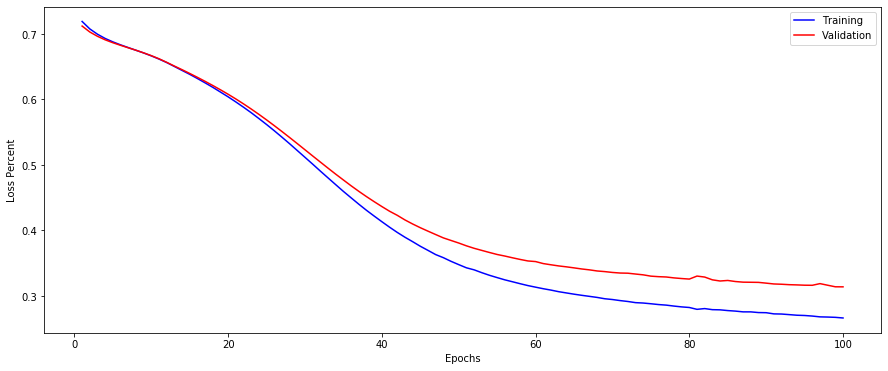

In [81]:
inspect(model, fitting)